In [9]:
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

Counter({0: 9900, 1: 100})


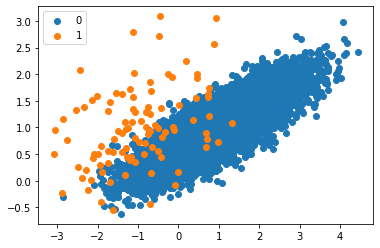

In [10]:
from matplotlib import pyplot as plt
from numpy import where
from collections import Counter

counter = Counter(y)
print(counter)

def plot_points(counter):
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    plt.legend()
    plt.show()
    
plot_points(counter)

In [11]:
import imblearn
print(imblearn.__version__)

0.8.1


In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def logistic_regression(X,y):
    # Train a logistic regression model using the balanced class weights 

    default_log_reg = LogisticRegression(class_weight=None)
    balanced_log_reg = LogisticRegression(class_weight='balanced')

    # Important to use a stratified K folds to make sure representative proportion of minority examples are used in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True)

    scores = cross_val_score(estimator=default_log_reg, X=X, y=y, cv=cv, scoring='accuracy')
    def_log_reg_acc = np.mean(scores)

    scores = cross_val_score(estimator=balanced_log_reg, X=X, y=y, cv=cv, scoring='accuracy')
    bal_log_reg_acc = np.mean(scores)

    scores = cross_val_score(estimator=default_log_reg, X=X, y=y, cv=cv, scoring='roc_auc')
    def_log_reg_roc = np.mean(scores)

    scores = cross_val_score(estimator=balanced_log_reg, X=X, y=y, cv=cv, scoring='roc_auc')
    bal_log_reg_roc = np.mean(scores)

    print("Default logistic regression accuracy  =", '{:.6f}, AUC = {:.6f}'.format(def_log_reg_acc, def_log_reg_roc))
    print("Balanced logistic regression accuracy =", '{:.6f}, AUC = {:.6f}'.format(bal_log_reg_acc, bal_log_reg_roc))

In [32]:
logistic_regression(X,y)

Default logistic regression accuracy  = 0.994400, AUC = 0.945293
Balanced logistic regression accuracy = 0.916100, AUC = 0.946778


Counter({0: 100, 1: 100})


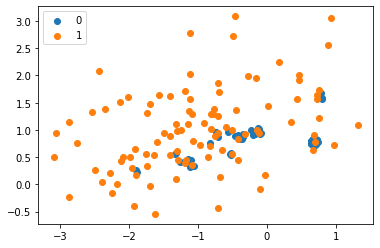

Default logistic regression accuracy  = 0.800000, AUC = 0.843000
Balanced logistic regression accuracy = 0.780000, AUC = 0.864000


In [33]:
# NearMiss-1
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({0: 100, 1: 41})


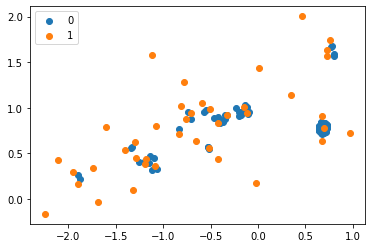

Default logistic regression accuracy  = 0.767241, AUC = 0.777500
Balanced logistic regression accuracy = 0.651970, AUC = 0.750972


In [34]:
from imblearn.under_sampling import CondensedNearestNeighbour

undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({0: 89, 1: 41})


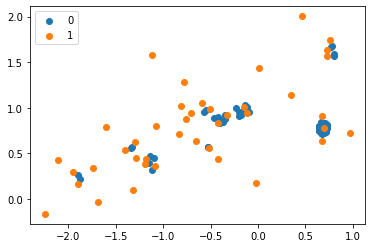

Default logistic regression accuracy  = 0.784615, AUC = 0.814461
Balanced logistic regression accuracy = 0.676923, AUC = 0.794281


In [35]:
from imblearn.under_sampling import TomekLinks

undersample = TomekLinks()
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({0: 199, 1: 41})


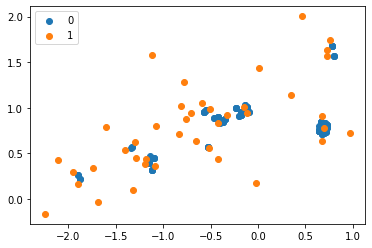

Default logistic regression accuracy  = 0.837500, AUC = 0.796457
Balanced logistic regression accuracy = 0.637500, AUC = 0.795410


In [36]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)